# Principal Component Analysis（主成分分析）

## 一、PCA介绍

#### 1、特点
#### （1）一个非监督的机器学习算法；
#### （2）主要用于数据的降维，通过降维可以发现更便于人类理解的特征；
#### （3）其他应用：可视化；去噪。

 ## 二、使用梯度上升法求解PCA问题

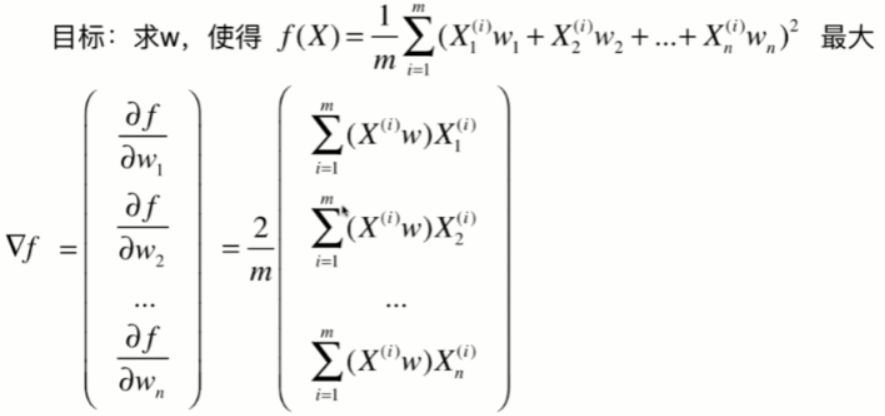

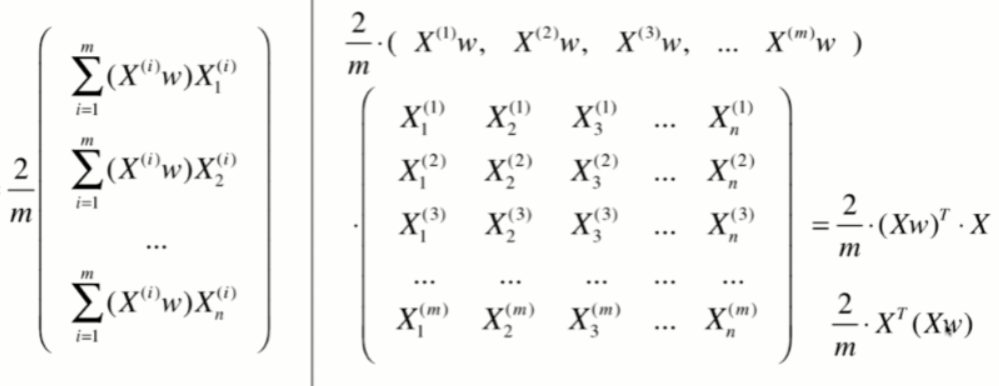

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

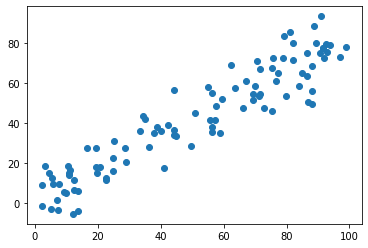

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

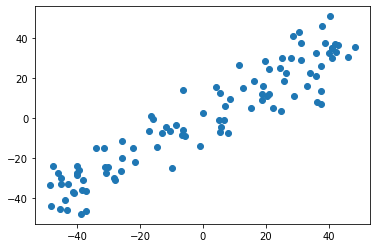

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

1.566746732351021e-14

In [8]:
np.mean(X_demean[:,1])

1.4850343177386093e-14

### 梯度上升法

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [10]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [11]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2*epsilon)
    return res

In [12]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1：w需要每次归约成为一个单位方向向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        i_iter += 1
        
    return w

In [13]:
initial_w = np.random.random(X.shape[1])  # 注意2：初始向量不能为零向量
initial_w

array([0.65927612, 0.63094408])

In [14]:
eta = 0.001

In [15]:
# 注意3：PCA不能使用StandardScaler标准化数据

In [16]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.76569031, 0.64320942])

In [17]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
w

array([0.76569031, 0.64320942])

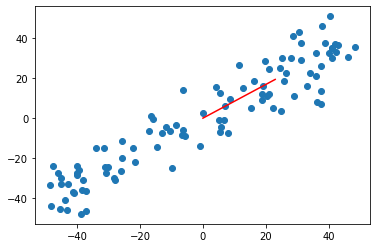

In [18]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

In [19]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

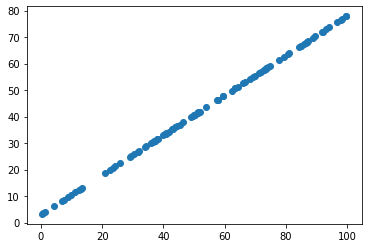

In [20]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [21]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
w2

array([0.79999947, 0.60000071])

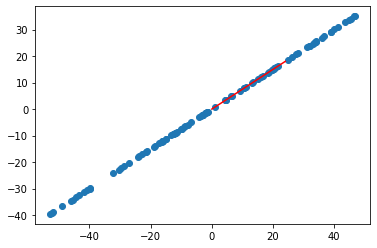

In [22]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

## 三、求数据的前n个主成分

#### 第一主成分

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [25]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

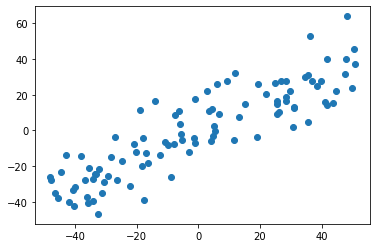

In [26]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [27]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        i_iter += 1
        
    return w

In [28]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77785688, 0.62844147])

#### 第二主成分

In [29]:
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w

X2 = X - X.dot(w).reshape(-1, 1) * w

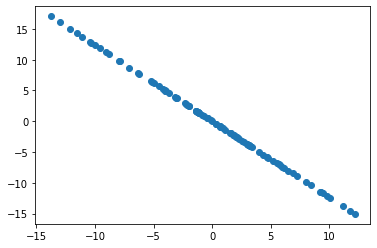

In [30]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [31]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.6284391 ,  0.77785879])

In [32]:
w.dot(w2)

3.0443516396694292e-06

#### 合并求解过程

In [33]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [34]:
first_n_components(2, X)

[array([0.77785696, 0.62844136]), array([ 0.62844396, -0.77785486])]

## 四、高维数据向低维数据映射

In [35]:
%run D://资料//程序//Python//Machine_Learn//PCA//pca.py

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [38]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [39]:
pca.components_

array([[ 0.79162535,  0.61100679],
       [ 0.61101016, -0.79162275]])

In [40]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [41]:
X_reduction = pca.transform(X)

In [42]:
X_reduction.shape

(100, 1)

In [43]:
X_restore = pca.inverse_transform(X_reduction)

In [44]:
X_restore.shape

(100, 2)

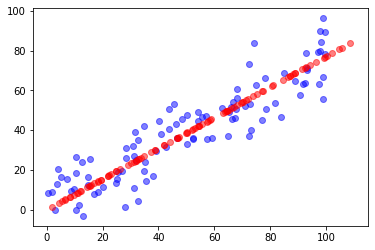

In [45]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

## 五、scikit-learn中的PCA

#### 1、使用自己数据集

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca.components_

array([[0.79162537, 0.61100677]])

In [49]:
X_reduction = pca.transform(X)

In [50]:
X_reduction.shape

(100, 1)

In [51]:
X_restore = pca.inverse_transform(X_reduction)

In [52]:
X_restore.shape

(100, 2)

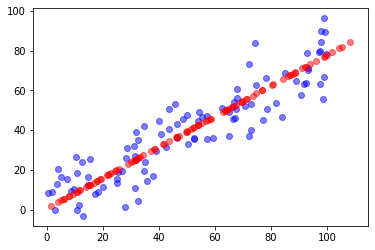

In [53]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

#### 2、使用scikit-learn数据集

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [55]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
X_train.shape

(1347, 64)

In [58]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 32.9 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [61]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
knn_clf.score(X_test_reduction, y_test)

0.6377777777777778

In [63]:
pca.explained_variance_ratio_

array([0.14604152, 0.13494214])

In [64]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.46041519e-01, 1.34942144e-01, 1.19078585e-01, 8.67768325e-02,
       5.87230300e-02, 4.87758771e-02, 4.28133729e-02, 3.63987085e-02,
       3.34262573e-02, 3.00798385e-02, 2.44375802e-02, 2.28389490e-02,
       1.83733831e-02, 1.76464081e-02, 1.48294904e-02, 1.40404689e-02,
       1.29894698e-02, 1.27683614e-02, 1.01050536e-02, 9.36400824e-03,
       8.84741015e-03, 8.18544701e-03, 7.65414859e-03, 7.22100298e-03,
       6.77909393e-03, 5.79237485e-03, 5.74341559e-03, 5.14824241e-03,
       4.94833221e-03, 4.27847495e-03, 3.74699150e-03, 3.60404170e-03,
       3.42696319e-03, 3.20974433e-03, 3.08736485e-03, 2.89753167e-03,
       2.51543992e-03, 2.27491256e-03, 2.22288930e-03, 2.11387686e-03,
       1.88396516e-03, 1.58549402e-03, 1.47068961e-03, 1.42548191e-03,
       1.20095304e-03, 1.07760351e-03, 9.61680746e-04, 8.33246524e-04,
       5.47617507e-04, 3.83909104e-04, 2.43917931e-04, 8.18383254e-05,
       4.97963280e-05, 4.03540696e-05, 3.89497757e-05, 1.34617869e-05,
      

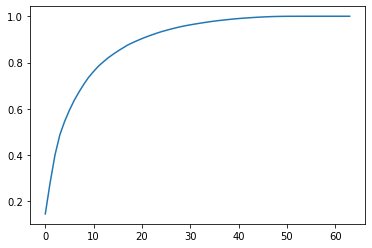

In [65]:
plt.plot([i for i in range(X_train.shape[1])], 
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [66]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
pca.n_components_

29

In [68]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [69]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 7.98 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
knn_clf.score(X_test_reduction, y_test)

0.9866666666666667

In [71]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

In [72]:
X_reduction.shape

(1797, 2)

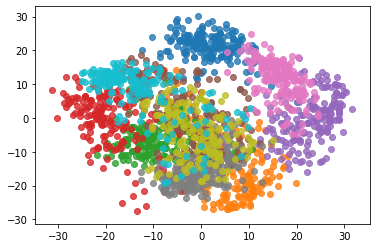

In [73]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8)
plt.show()

#### 3、MNIST数据集

In [74]:
import numpy as np
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')
mnist

In [ ]:
X,y = mnist['data'], mnist['target']

In [ ]:
X.shape

In [ ]:
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

In [ ]:
%time knn_clf.score(X_test, y_test)

#### PCA进行降维

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [ ]:
X_train_reduction.shape

In [ ]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

In [ ]:
X_test_reduction = pca.transform(X_test)

In [ ]:
%time knn_clf.score(X_test_reduction, y_test)

## 六、使用PCA进行降噪

#### 1、使用自己数据集

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5., size=100)

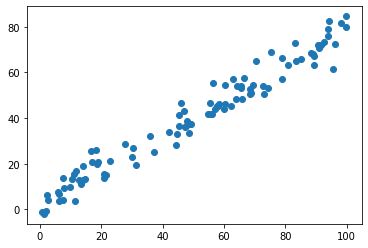

In [78]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

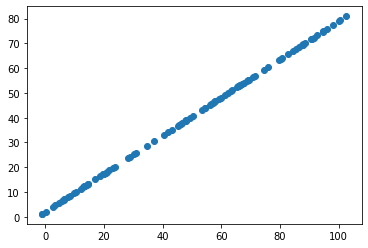

In [80]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

#### 2、使用scikit-learn数据集

In [82]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [83]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [84]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [85]:
example_digits.shape

(100, 64)

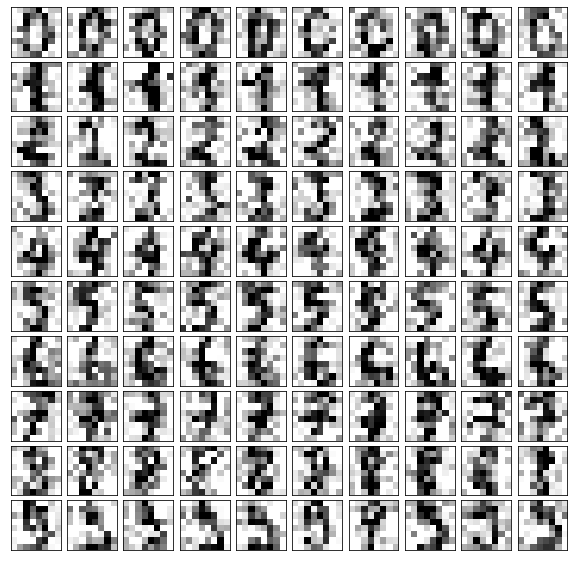

In [86]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                            subplot_kw={'xticks':[], 'yticks':[]}, 
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), 
                 cmap='binary', interpolation='nearest', 
                 clim=(0, 16))
    plt.show()
    
plot_digits(example_digits)

In [87]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
pca.n_components_

12

In [89]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

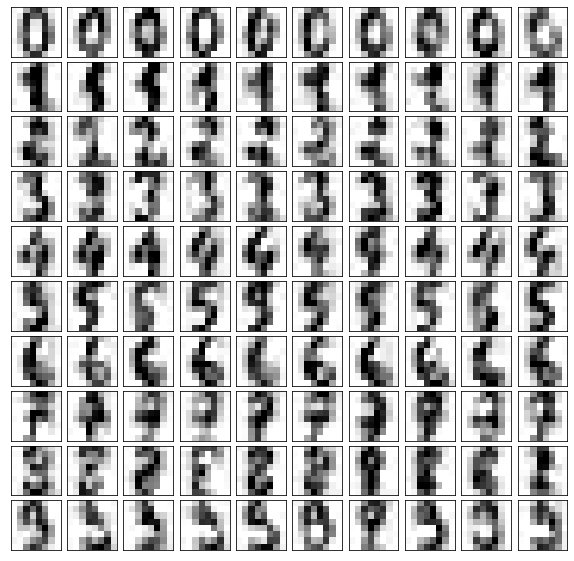

In [90]:
plot_digits(filtered_digits)